In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import time
from pymongo import MongoClient


In [4]:
df_integrated = pd.read_csv("./6_integrated_cleaned/integration_cleaned_definitive.csv")
# import os
# from dotenv import load_dotenv

# load_dotenv(".env")

# connection_string = os.getenv("MONGODB_CONNECTION_STRING")
# client = MongoClient(connection_string)

# db = client.restaurant_db
# collection = db.restaurant_integrated
# documents = collection.find()
# data = [doc for doc in documents]
# df_integrated = pd.DataFrame(data)
# df_integrated['price_level'].isna().sum()

In [5]:
print(df_integrated.describe())

          latitude    longitude       rating  price_level  total_reviews
count  3600.000000  3600.000000  3341.000000  2996.000000    3600.000000
mean     45.471810     9.187882     4.110373     1.927575     662.308333
std       0.019183     0.028056     0.366198     0.752969     781.623694
min      45.404514     9.068646     1.021739     1.000000       0.000000
25%      45.457304     9.171372     3.915714     1.000000     132.000000
50%      45.471383     9.188448     4.158038     2.073309     395.000000
75%      45.483804     9.207521     4.319588     2.278782     924.250000
max      45.531519     9.267466     5.000000     4.000000   10671.000000


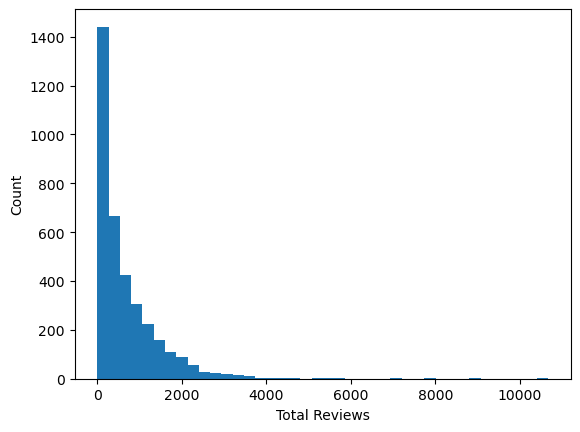

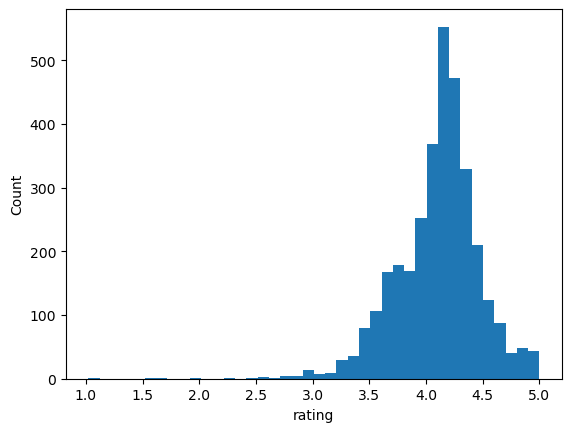

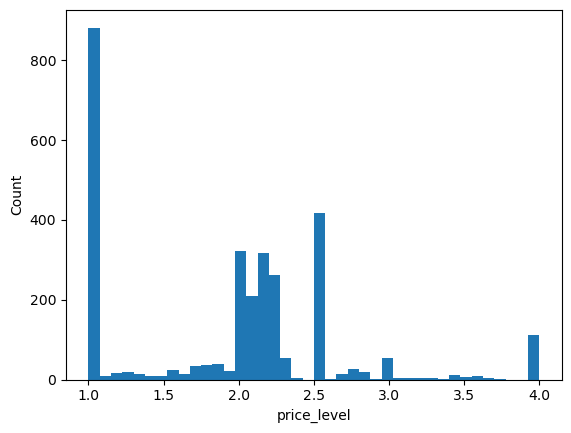

In [6]:
# Histogram of total_reviews
# fields = {
#     'price_level': 1,
#     'rating': 1,
#     'total_reviews': 1
# }

# # Query the collection to retrieve documents with the specified fields
# documents = collection.find({}, fields)

# # Convert the documents to a list of dictionaries
# data = [doc for doc in documents]

# # Create a DataFrame from the data
# df = pd.DataFrame(data)
df = df_integrated
plt.hist(df['total_reviews'], bins=40)
plt.xlabel('Total Reviews')
plt.ylabel('Count')
plt.show()
plt.hist(df['rating'], bins=40)
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()
plt.hist(df['price_level'], bins=40)
plt.xlabel('price_level')
plt.ylabel('Count')
plt.show()

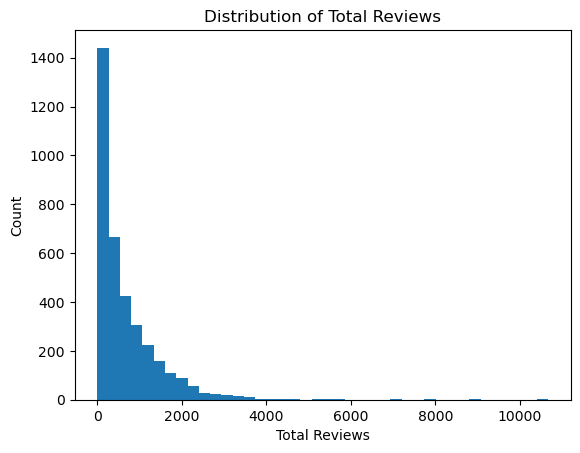

Mean: 662.3083333333333
Median: 395.0
Skewness: 2.980879227234029
The distribution is highly skewed.
Standard deviation: 781.6236941544724
The data is relatively spread out from the mean.
ci sono 181 outliers in questa distribuzione


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




# Create a histogram of the distribution
plt.hist(df_integrated['total_reviews'], bins=40)
plt.xlabel('Total Reviews')
plt.ylabel('Count')
plt.title('Distribution of Total Reviews')
plt.show()

# Calculate the mean and median of the data
mean = df_integrated['total_reviews'].mean()
median = df_integrated['total_reviews'].median()

# Print the mean and median
print("Mean:", mean)
print("Median:", median)

# Calculate the skewness of the data
skewness = df_integrated['total_reviews'].skew()

# Print the skewness of the data and interpret it
print("Skewness:", skewness)

if skewness < -1 or skewness > 1:
    print("The distribution is highly skewed.")
elif skewness < -0.5 or skewness > 0.5:
    print("The distribution is moderately skewed.")
else:
    print("The distribution is approximately symmetric.")
    
# Calculate the standard deviation of the data
std_dev = df_integrated['total_reviews'].std()

# Print the standard deviation and interpret it
print("Standard deviation:", std_dev)

if std_dev < mean:
    print("The data is relatively tightly clustered around the mean.")
elif std_dev > mean:
    print("The data is relatively spread out from the mean.")
else:
    print("The spread of the data is approximately equal on both sides of the mean.")
    
# Identify any outliers in the data
q1 = np.percentile(df_integrated['total_reviews'], 25)
q3 = np.percentile(df_integrated['total_reviews'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = df_integrated[(df_integrated['total_reviews'] < lower_bound) | (df_integrated['total_reviews'] > upper_bound)]

# Print any outliers in the data
#print(f"ci sono  "len(outliers)" outliers in questa distribuzione")
print(f"ci sono {len(outliers)} outliers in questa distribuzione")


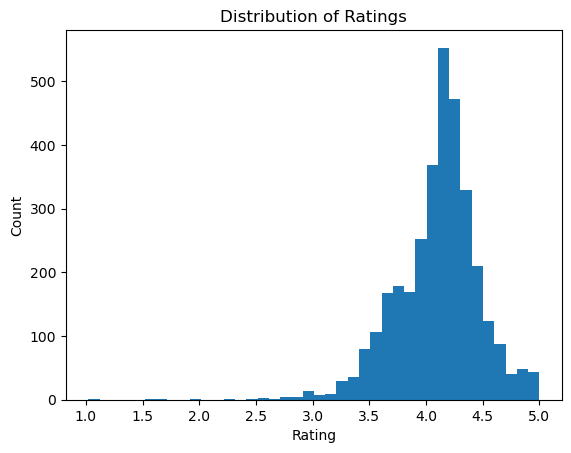

Mean: 4.110372966686255
Median: 4.1580381471389645
Skewness: -0.9101084984025848
The distribution is moderately skewed.
Standard deviation: 0.36619787626979666
The data is relatively tightly clustered around the mean.
There are 0 outliers in the rating distribution.


In [8]:
# Analyze the 'rating' distribution
plt.hist(df_integrated['rating'], bins=40)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

# Calculate the mean and median of the data
mean = df_integrated['rating'].mean()
median = df_integrated['rating'].median()

# Print the mean and median
print("Mean:", mean)
print("Median:", median)

# Calculate the skewness of the data
skewness = df_integrated['rating'].skew()

# Print the skewness of the data and interpret it
print("Skewness:", skewness)

if skewness < -1 or skewness > 1:
    print("The distribution is highly skewed.")
elif skewness < -0.5 or skewness > 0.5:
    print("The distribution is moderately skewed.")
else:
    print("The distribution is approximately symmetric.")
    
# Calculate the standard deviation of the data
std_dev = df_integrated['rating'].std()

# Print the standard deviation and interpret it
print("Standard deviation:", std_dev)

if std_dev < mean:
    print("The data is relatively tightly clustered around the mean.")
elif std_dev > mean:
    print("The data is relatively spread out from the mean.")
else:
    print("The spread of the data is approximately equal on both sides of the mean.")
    
# Identify any outliers in the data
q1 = np.percentile(df_integrated['rating'], 25)
q3 = np.percentile(df_integrated['rating'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = df_integrated[(df_integrated['rating'] < lower_bound) | (df_integrated['rating'] > upper_bound)]

# Print any outliers in the data
print(f"There are {len(outliers)} outliers in the rating distribution.")


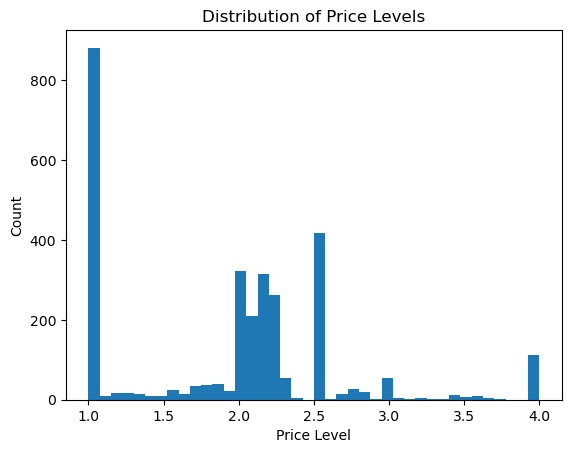

Mean: 1.9275752477204797
Median: 2.073309021568499
Skewness: 0.5095699155678228
The distribution is moderately skewed.
Standard deviation: 0.7529694684791002
The data is relatively tightly clustered around the mean.
There are 0 outliers in the rating distribution.


In [9]:
# Analyze the 'price_level' distribution
plt.hist(df_integrated['price_level'], bins=40)
plt.xlabel('Price Level')
plt.ylabel('Count')
plt.title('Distribution of Price Levels')
plt.show()

# Calculate the mean and median of the data
mean = df_integrated['price_level'].mean()
median = df_integrated['price_level'].median()

# Print the mean and median
print("Mean:", mean)
print("Median:", median)

# Calculate the skewness of the data
skewness = df_integrated['price_level'].skew()

# Print the skewness of the data and interpret it
print("Skewness:", skewness)

if skewness < -1 or skewness > 1:
    print("The distribution is highly skewed.")
elif skewness < -0.5 or skewness > 0.5:
    print("The distribution is moderately skewed.")
else:
    print("The distribution is approximately symmetric.")
    
# Calculate the standard deviation of the data
std_dev = df_integrated['price_level'].std()

# Print the standard deviation and interpret it
print("Standard deviation:", std_dev)

if std_dev < mean:
    print("The data is relatively tightly clustered around the mean.")
elif std_dev > mean:
    print("The data is relatively spread out from the mean.")
else:
    print("The spread of the data is approximately equal on both sides of the mean.")
    
# Identify any outliers in the data
q1 = np.percentile(df_integrated['price_level'], 25)
q3 = np.percentile(df_integrated['price_level'], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = df_integrated[(df_integrated['price_level'] < lower_bound) | (df_integrated['price_level'] > upper_bound)]

# Print any outliers in the data
print(f"There are {len(outliers)} outliers in the rating distribution.")


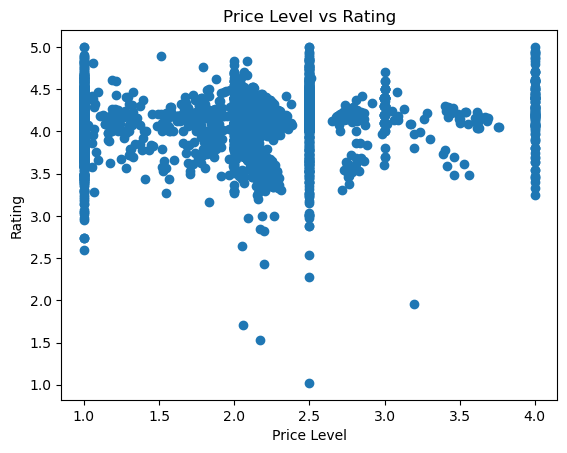

Correlation coefficient: 0.05333970463331225
There is a weak correlation between price_level and rating.


In [10]:
# Scatter plot of price_level vs rating
plt.scatter(df_integrated['price_level'], df_integrated['rating'])
plt.xlabel('Price Level')
plt.ylabel('Rating')
plt.title('Price Level vs Rating')
plt.show()

# Calculate the correlation coefficient between price_level and rating
corr_coef = df_integrated['price_level'].corr(df_integrated['rating'])

# Print the correlation coefficient and interpret it
print("Correlation coefficient:", corr_coef)

if corr_coef < -0.5 or corr_coef > 0.5:
    print("There is a strong correlation between price_level and rating.")
elif corr_coef < -0.3 or corr_coef > 0.3:
    print("There is a moderate correlation between price_level and rating.")
else:
    print("There is a weak correlation between price_level and rating.")
    


In [11]:
grouped = df_integrated.groupby('cook_type').agg({'total_reviews': 'mean', 'rating': 'mean'})
print(grouped)

                      total_reviews    rating
cook_type                                    
Africana                 170.833333  4.375865
Africana, Etiope         575.000000  4.233083
Africana, Marocchina     395.000000  4.299747
Africana, Pesce          722.000000  4.370360
Americana                492.111111  3.922514
...                             ...       ...
Turca, Mediorientale     330.500000  4.085590
Vietnamita, Pesce        370.000000  4.274865
Wine Bar                1043.500000  4.624263
Wine Bar, Caffè          126.000000  3.794444
Wine Bar, Italiana       147.666667  4.222700

[372 rows x 2 columns]


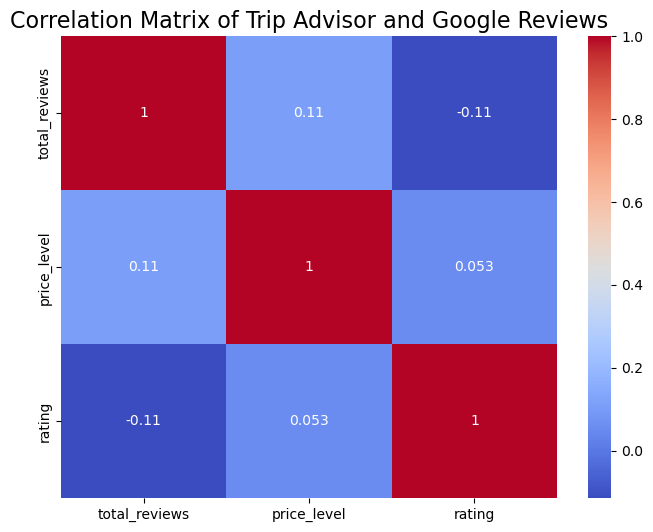

In [12]:
# Calculate the correlation matrix
corr_matrix = df_integrated[['total_reviews', 'price_level', 'rating']].corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix of Trip Advisor and Google Reviews', fontsize=16)
plt.show()



In [13]:
# import pandas as pd
import plotly.express as px



# Split the cuisine types into separate columns
df_integrated[['cuisine_type_1', 'cuisine_type_2']] = df_integrated['cook_type'].str.split(',', n=1, expand=True)

# Get the counts of each cuisine type in the dataframe
cuisine_counts = pd.concat([df_integrated['cuisine_type_1'], df_integrated['cuisine_type_2']]).value_counts()
#cuisine_counts.pop("?")
# Create a bar plot using plotly express

fig = px.bar(x=cuisine_counts.index[:15], y=cuisine_counts.values[:15])

# Set the plot title and axis labels

fig.update_layout(title='Cuisine Type Counts', xaxis_title='Cuisine Type', yaxis_title='Count')

# Show the plot
fig.show()


In [14]:
# Split cuisine types into separate rows
cuisines = df_integrated['cook_type'].str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)

# Get value counts of cuisine types
cuisine_counts = cuisines.value_counts()
cuisine_counts['value'] = cuisines.value_counts()
#cuisine_counts.pop("?")
cuisine_counts.head(15)




Italiana        2086
Pizza            695
Pesce            463
Mediterranea     348
Cinese           292
Giapponese       271
Bar              208
Asiatica         136
Americana        111
Fast food        106
Caffè             82
Sushi             76
Pub               70
Steakhouse        56
Lombarda          52
Name: count, dtype: object

In [15]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=cuisine_counts.index[:15], y=cuisine_counts.values[:15])])
fig.update_layout(title='Cuisine Type Counts', xaxis_title='Cuisine Type', yaxis_title='Count')

fig.show()


In [16]:
#query the first 10 pizza restaurants that has the highest rating and the highest number of reviews

# word = "Pizza"

# # Construct the regular expression pattern
# pattern = f"\\b{word}\\b"

# # Define the query using the regular expression pattern
# query = {
#     'cook_type': {
#         '$regex': pattern,
#         '$options': 'i'  # Case-insensitive search
#     }
# }

# sort_criteria = [
#     ('rating', -1),
#     ('total_reviews', -1)
# ]

# documents = collection.find(query).sort(sort_criteria).limit(10)

# # Convert the documents to a list of dictionaries
# data = [doc for doc in documents]

# # Create a DataFrame from the data
# df = pd.DataFrame(data)

# print("10 best pizza of milan!!!")
# df

In [17]:
#check if the average prices close to the center is higher than far
# Duomo Milano 45.4641972, 9.1723051

import pandas as pd
from geopy.distance import geodesic

df = pd.read_csv("./6_integrated_cleaned/integration_cleaned_definitive.csv")
# Input point coordinates (latitude, longitude)
input_point = (45.464155, 9.189972)

# Calculate distance between two points using geodesic distance
def calculate_distance(row):
    point = (row['latitude'], row['longitude'])
    return geodesic(input_point, point).km

# Calculate distance for each point in the dataset
df['distance'] = df.apply(calculate_distance, axis=1)
# Filter points within 3 km and calculate average price
points_within_3km = df.loc[df['distance'] < 1].dropna()
average_price_within_3km = points_within_3km['price_level'].mean()

# Filter points beyond 3 km and calculate average price
points_beyond_3km = df.loc[df['distance'] >= 3].dropna()
average_price_beyond_3km = points_beyond_3km['price_level'].mean()

print("the average price close to the center is ", average_price_within_3km)
print("the average price far to the center is ", average_price_beyond_3km)

the average price close to the center is  2.2344880595013823
the average price far to the center is  1.707686667916198


In [18]:
df_integrated

,place_id,name,cook_type,types,address,latitude,longitude,rating,price_level,total_reviews,reviews,cuisine_type_1,cuisine_type_2
0,ChIJp1t0B3rBhkcRkhvz_gk4ARw,Mabuhay Restaurant,Filippina,"['restaurant', 'food', 'point_of_interest', 'e...","Bastioni di Porta Volta 9, 20121 Milano Italia",45.479307,9.182119,4.897793,1.511034,1722.0,"[{'bubbles': 'bubble_50', 'title': 'Piacevole ...",Filippina,None
1,ChIJNaMlrjfBhkcReLHYJXwZdZU,Parea Bistrot,NaN,"['restaurant', 'food', 'point_of_interest', 'e...","Via Vigna 6, 20123 Milano Italia",45.464111,9.179431,4.895327,NaN,214.0,"[{'bubbles': 'bubble_50', 'title': 'Locale sex...",NaN,NaN
2,ChIJ-6W1E6bGhkcRR5BCiZUxEGg,Il Panino,"Italiana, Cibo di strada","['restaurant', 'food', 'point_of_interest', 'e...","Via Laghetto 7, 20122 Milano Italia",45.461563,9.195638,4.835329,1.000000,501.0,"[{'bubbles': 'bubble_50', 'title': 'Da brevett...",Italiana,Cibo di strada
3,ChIJAT5Z3wjBhkcRr-dUFcAhgX4,Cantiere Hambirreria,"Italiana, Americana","['restaurant', 'food', 'bar', 'point_of_intere...","Corso Garibaldi, 111, 20121 Milano Italia",45.478721,9.185232,4.675467,2.000000,1553.0,"[{'bubbles': 'bubble_50', 'title': 'SUPER!', '...",Italiana,Americana
4,ChIJ_4UjHuXBhkcRQXJ5r5hdRHs,BLUE M Milano - Bottega Marchigiana,Italiana,"['restaurant', 'food', 'point_of_interest', 'e...",Via Lanzone 27 Sant'Ambrogio - Università Catt...,45.460627,9.176588,4.889600,1.000000,250.0,"[{'bubbles': 'bubble_50', 'title': 'Le Marche ...",Italiana,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,ChIJeyYJ7-bGhkcR32WFx77-Al4,D'sumare Restaurante & Polleria,"Peruviana, Cibo di strada","['restaurant', 'point_of_interest', 'food', 'e...","Via Padova 31, 20127 Milano Italia",45.487479,9.218211,NaN,NaN,1289.0,[],Peruviana,Cibo di strada
3596,ChIJoZRSKbzHhkcR21lB-b6HT4M,Radhuni Indian Restaurant,"Indiana, Fast food","['restaurant', 'point_of_interest', 'food', 'e...","Via Predabissi angolo via Padova, Milano Italia",45.490961,9.223433,NaN,NaN,16.0,[],Indiana,Fast food
3597,ChIJEymO4ePGhkcR2Mx0NtAsQME,Cleopatra Pizza,"Pizza, Fast food","['restaurant', 'point_of_interest', 'food', 'e...","Via Padova, 29, 20127 Milano Italia",45.489843,9.221324,NaN,NaN,34.0,[],Pizza,Fast food
3598,ChIJN9AcT6LDhkcRPweDZ_3Hnqw,Davet Turkish Kebap Pizzeria Grill,"Pizza, Fast food","['restaurant', 'food', 'point_of_interest', 'e...","Piazzale Stazione Genova, 2, 20144 Milano Italia",45.453805,9.170096,NaN,1.000000,337.0,[],Pizza,Fast food


In [19]:
cookies = df_integrated['cook_type']

array = []
for i in cookies:
    if pd.notnull(i) and i != "?" and isinstance(i, str):
        for l in i.split(','):
            array.append(l.strip()) # using strip to remove leading/trailing spaces
         
array = list(set(array))

result = []
for el in array:
    y = []
    for x in df_integrated.iterrows():
        if pd.notnull(x[1]['cook_type']) and el in x[1]['cook_type']:
            y.append(x[1]['rating'])
    result.append({'type': el, 'ratings': y})
    
print(result)


[{'type': 'Cubana', 'ratings': [4.236423841059603, 3.815698178664354]}, {'type': 'Sushi', 'ratings': [4.499130434782609, 4.1751567398119125, 4.397457627118645, 4.106309148264985, 4.37068062827225, 4.284461152882206, 4.12665832290363, 4.925652173913043, 4.16265625, 4.299673558215451, 4.402852049910874, 4.07, 4.291666666666667, 4.071556886227545, 4.2493670886075945, 4.177021276595744, 4.0, 4.048529411764705, 4.460465116279069, 3.869333333333333, 4.450574712643678, 4.172360248447205, 4.0, 4.368904593639576, 4.175641025641026, 4.528695652173913, 4.0, 4.075886524822695, 3.457272727272728, 4.008695652173913, 3.799507995079951, 4.0, 4.088235294117647, 4.1861702127659575, 3.614173228346457, 4.461038961038961, 3.661990950226244, 4.537037037037037, 3.960192175703501, 4.56875, 4.411764705882353, 3.7291666666666665, 4.674660633484162, 4.908474576271187, 4.186147186147186, 4.733333333333333, 3.9384615384615382, 3.7393442622950817, 4.430508474576272, 4.196859504132231, 3.939805825242718, 3.620618556

In [20]:
# df_integrated['cook_type_trip']
# cookies=df_integrated['cook_type_trip']

# array=[]
# for i in cookies:
#      if i is not  None and i != "?" and  isinstance(i,str):
#          for l in i.split(','):
#              array.append(l)
         
# array = list(set(array))

# result = []
# for el in array:
#      y = []
#      for x in df.iterrows():
#          if el in x['cook_type_trip']:
#              y.append(x['rating'])
#      result.append({'type': el, 'ratings': y})
    
# print(result)
# cookies['cook_type_trip'].str.split(',', n=1, expand=True)

In [21]:
array=[]
for i in cookies:
    if i is not  None and i != "?" and  isinstance(i,str):
        for l in i.split(','):
            array.append(l)
         
array = list(set(array))

result = []
for el in array:
    y = []
    for x in df_integrated.iterrows():
        if pd.notna(x[1]['cook_type']) and el in x[1]['cook_type'] and  pd.notna(x[1]['rating']):
            y.append(x[1]['rating'])
    result.append({'type': el, 'ratings': y})

print(result)

[{'type': 'Cubana', 'ratings': [4.236423841059603, 3.815698178664354]}, {'type': 'Italiana (nord)', 'ratings': [4.298265895953757, 4.5, 4.271458117890383, 4.399609375000001, 4.055567567567567, 4.191830985915493, 4.384615384615385, 4.369165085388994, 4.179591836734694, 4.146506024096386, 3.73062865497076, 4.199233716475096, 4.8315789473684205, 4.496428571428571, 4.697435897435897, 3.442462686567164, 4.255140186915888, 4.363636363636363, 5.0, 4.84, 4.409090909090909, 4.0, 5.0, 4.627272727272727, 3.7492753623188406, 4.523076923076922, 4.3981566820276505, 4.472222222222222, 4.105511811023622, 4.0, 4.815384615384615, 4.515151515151516, 4.1225, 4.18125, 3.967741935483871, 2.8181102362204724]}, {'type': ' Pizza', 'ratings': [4.299883900928792, 4.399812996727443, 4.140724946695096, 4.4996875781054735, 4.253719008264463, 4.187931034482759, 4.599090909090909, 4.379411764705882, 4.699448384554768, 4.3234442836468885, 4.840687679083095, 4.299516129032257, 4.144820512820513, 4.163829787234042, 4.28

In [22]:
while None in array:
    array.remove(None)

for cuisine in result:
    avg_rating = np.mean(cuisine['ratings'])
    print(f"{cuisine['type']}: {avg_rating:.2f}")

Cubana: 4.03
Italiana (nord): 4.29
 Pizza: 4.02
Sushi: 4.14
 Mediorientale: 3.94
 Italiana (centro): 4.15
 Barbecue: 4.12
Greca: 4.24
Tedesca: 3.89
 Grill: 4.19
 Gastropub: 4.00
 Mediterranea: 4.11
 Nepalese: 4.39
Peruviana: 4.05
Americana: 4.04
 Francese: 4.25
 Fusion: 4.18
Giapponese: 4.10
Calabrese: 4.46
 Bar: 4.03
Siciliana: 4.01
 Napoletana: 4.04
 Toscana: 4.26
 Cajun e creola: 4.48
 Caffè: 3.89
 Campana: 4.27
Olandese: 3.39
 Pakistana: 4.25
 Steakhouse: 4.23
Egiziana: 4.30
 Zuppe: 4.23
 Tailandese: 4.23
 Uzbeca: 4.24
Vietnamita: 4.14
Belga: 4.54
 Lombarda: 4.03
Internazionale: 4.16
Filippina: 4.42
Portoghese: 4.45
 Peruviana: 4.18
Barbecue: 4.15
 Pasticceria giapponese: 4.44
 Greca: 4.35
Bar: 4.06
 Colombiana: nan
Grill: 4.21
Tailandese: 4.23
 Spagnola: 3.99
 Pub: 4.26
Pugliese: 4.33
 Cibo di strada: 4.20
 Araba: 4.06
 Contemporanea: 4.34
 Belga: 4.69
 Gastronomia: 4.24
 Pesce: 4.16
Caffè: 3.92
 Centro asiatica: 4.10
 Britannica: 3.77
 Latino americana: 4.15
 Internazionale: 4.17

/Users/matteomondini/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning:

Mean of empty slice.

/Users/matteomondini/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning:

invalid value encountered in scalar divide



In [23]:
# Compute average ratings for each cuisine
averages = []
labels = []
averages_e_labels=[]
for cuisine in result:
    if len(cuisine['ratings']) > 0:
        averages_e_labels.append({"labels": cuisine['type'], "averages":np.mean(cuisine['ratings'])})
#         labels.append(cuisine['type'])
#         averages.append(np.mean(cuisine['ratings']))
# averages.sort()
#labels.sort()
print(averages_e_labels)

[{'labels': 'Cubana', 'averages': 4.026061009861978}, {'labels': 'Italiana (nord)', 'averages': 4.287719451034283}, {'labels': ' Pizza', 'averages': 4.019081319254988}, {'labels': 'Sushi', 'averages': 4.144015088010174}, {'labels': ' Mediorientale', 'averages': 3.9445594369289143}, {'labels': ' Italiana (centro)', 'averages': 4.152650844049748}, {'labels': ' Barbecue', 'averages': 4.119090310034837}, {'labels': 'Greca', 'averages': 4.2439040996861594}, {'labels': 'Tedesca', 'averages': 3.8882981953843485}, {'labels': ' Grill', 'averages': 4.187097374388515}, {'labels': ' Gastropub', 'averages': 3.999424865394028}, {'labels': ' Mediterranea', 'averages': 4.106717058434947}, {'labels': ' Nepalese', 'averages': 4.391100323624595}, {'labels': 'Peruviana', 'averages': 4.050604475115856}, {'labels': 'Americana', 'averages': 4.042701560927197}, {'labels': ' Francese', 'averages': 4.254608214921046}, {'labels': ' Fusion', 'averages': 4.178908207026499}, {'labels': 'Giapponese', 'averages': 4.1

In [24]:
neew=[]

for ciacia in averages_e_labels:
    for r in cuisine_counts.index[:11]:
        if ciacia["labels"]==r:
            neew.append(ciacia)
print(neew)

[{'labels': 'Americana', 'averages': 4.042701560927197}, {'labels': 'Giapponese', 'averages': 4.103178017248315}, {'labels': 'Bar', 'averages': 4.05790512011016}, {'labels': 'Caffè', 'averages': 3.9166575981486758}, {'labels': 'Pesce', 'averages': 4.164902313396783}, {'labels': 'Asiatica', 'averages': 4.2383119607280015}, {'labels': 'Fast food', 'averages': 4.10532499935073}, {'labels': 'Mediterranea', 'averages': 4.112247206830007}, {'labels': 'Pizza', 'averages': 4.03380876247592}, {'labels': 'Italiana', 'averages': 4.091527864621668}, {'labels': 'Cinese', 'averages': 4.092854940732187}]


In [25]:
import plotly.graph_objs as go

# Sort the dictionary in descending order of averages
neew_sorted = sorted(neew, key=lambda k: k['averages'], reverse=True)

# Create a bar chart with labels on the x-axis and averages on the y-axis
fig = go.Figure(go.Bar(
    x=[d['labels'] for d in neew_sorted],
    y=[d['averages'] for d in neew_sorted],
    marker_color='purple', # Change the color of the bars to purple
    text=[f'{d["averages"]:.2f}' for d in neew_sorted], # Set the text to the y-axis values
    textposition='auto' # Set the position of the text
))

# Set the plot title and axis labels
fig.update_layout(
    title='Average ratings of top 10 cuisine types',
    xaxis_title='Cuisine Type',
    yaxis_title='Average Rating'
)

# Show the plot
fig.show()



In [26]:
cuisine_counts

Italiana                                                     2086
Pizza                                                         695
Pesce                                                         463
Mediterranea                                                  348
Cinese                                                        292
                                      ...                        
Catalana                                                        1
Mongola                                                         1
Portoghese                                                      1
Bangladesh                                                      1
value           Italiana          2086
Pizza              695
...
Name: count, Length: 99, dtype: object

In [27]:

import scipy 
from sklearn.metrics import r2_score

df_integrated = df_integrated.dropna()

# Calculate the correlation coefficient between price_level and rating using Pearson correlation
corr_coef, p_value = scipy.stats.pearsonr(df_integrated['price_level'], df_integrated['rating'])
print("Pearson correlation coefficient:", corr_coef)
if p_value < 0.05:
    print("The correlation is significant.")
else:
    print("The correlation is not significant.")

# Calculate the coefficient of determination (R-squared)
r_squared = r2_score(df_integrated['price_level'].dropna(), df_integrated['rating'].dropna())
print("Coefficient of determination (R-squared):", r_squared)

# Create interactive scatter plot
fig = go.Figure(go.Scatter(
    x=df_integrated['price_level'],
    y=df_integrated['rating'],
    mode='markers',
    marker=dict(
        color='purple', # Change the color of the markers to purple
        size=10, # Set the size of the markers
        opacity=0.7 # Set the opacity of the markers
    )
))
fig.update_layout(xaxis_title='Price Level', yaxis_title='Rating')

# Show plot
fig.show()


Pearson correlation coefficient: 0.04663148450035667
The correlation is significant.
Coefficient of determination (R-squared): -8.3863355249243


In [28]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from statsmodels.api import OLS
from statsmodels.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats
from sklearn.metrics import r2_score
df_integrated = df_integrated.dropna()
#r2_score(df_integrated['price_level'], df_integrated['rating'])
# Calculate the correlation coefficient between price_level and rating using Pearson correlation
corr_coef, p_value = pearsonr(df_integrated['price_level'], df_integrated['rating'])
print("Pearson correlation coefficient:", corr_coef)
if p_value < 0.05:
    print("The correlation is significant.")
else:
    print("The correlation is not significant.")
#print("Coefficient of determination (R-squared):", r2_score(df_integrated['price_level'], df_integrated['rating']))
# Create interactive scatter plot
fig = go.Figure(go.Scatter(
    x=df_integrated['price_level'],
    y=df_integrated['rating'],
    mode='markers',
    marker=dict(
        color='purple', # Change the color of the markers to purple
        size=10, # Set the size of the markers
        opacity=0.7 # Set the opacity of the markers
    )
))
fig.update_layout(xaxis_title='Price Level', yaxis_title='Rating')

# Show plot
fig.show()

# Calculate the coefficient of determination (R-squared)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_integrated['price_level'].dropna(), df_integrated['rating'].dropna())
r_squared = r_value**2
print("Coefficient of determination (R-squared):", r_value**2)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_integrated['price_level'].dropna(), df_integrated['rating'].dropna())
r_squared = r_value**2
print("Coefficient of determination (R-squared):", r_squared)

Pearson correlation coefficient: 0.04663148450035667
The correlation is significant.


Coefficient of determination (R-squared): 0.002174495346707008
Coefficient of determination (R-squared): 0.002174495346707008


he Pearson correlation coefficient between the price_level and rating variables is 0.055, which suggests a weak positive correlation between the two variables.

The p-value of the correlation is less than 0.05, which means that the correlation is significant.

The coefficient of determination (R-squared) is 0.003, which means that only 0.3% of the variance in rating can be explained by price_level. This suggests that price_level is not a good predictor of rating.The conclusion is that there is a weak but significant positive correlation between price_level and rating, meaning that as the price_level increases, the rating tends to increase slightly as well. However, the R-squared value suggests that only a very small portion (0.3%) of the variability in rating can be explained by price_level. This means that while there is a correlation, price_level alone is not a good predictor of rating and other factors are likely at play in determining a restaurant's rating.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from statsmodels.api import OLS
from statsmodels.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats
# Calculate the coefficient of determination (R-squared)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_integrated['price_level'].dropna(), df_integrated['rating'].dropna())
r_squared = r_value**2
print("Coefficient of determination (R-squared):", r_squared)

Coefficient of determination (R-squared): 0.002174495346707008


In [30]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
df_integrated = df_integrated.dropna()

# Load the data into a Pandas DataFrame


# Create a scatter plot of total_reviews vs rating
fig = go.Figure(go.Scatter(
    x=df_integrated['total_reviews'],
    y=df_integrated['rating'],
    mode='markers',
    marker=dict(
        color='purple', # Change the color of the markers to purple
        size=10, # Set the size of the markers
        opacity=0.7 # Set the opacity of the markers
    )
))

# Set the plot title and axis labels
fig.update_layout(
    title='Total Reviews vs. Ratings',
    xaxis_title='Total Reviews',
    yaxis_title='Rating'
)

# Show the plot
fig.show()

# Calculate the correlation coefficient between total_reviews and rating using Pearson correlation
corr_coef, p_value = pearsonr(df_integrated['total_reviews'].dropna(), df_integrated['rating'].dropna())

# Print the correlation coefficient and interpret it
if not np.isnan(corr_coef) and not np.isinf(corr_coef):
    print("Pearson correlation coefficient:", corr_coef)
    if corr_coef < -0.5 or corr_coef > 0.5:
        print("There is a strong correlation between total_reviews and rating.")
    elif corr_coef < -0.3 or corr_coef > 0.3:
        print("There is a moderate correlation between total_reviews and rating.")
    else:
        print("There is a weak correlation between total_reviews and rating.")
else:
    print("Unable to calculate Pearson correlation coefficient due to NaNs or Infs in the data.")

# Calculate the linear regression line of best fit using scikit-learn
if not df_integrated['total_reviews'].isnull().values.any() and not df_integrated['rating'].isnull().values.any():
    model = LinearRegression().fit(df_integrated[['total_reviews']], df_integrated['rating'])
    m = model.coef_[0]
    b = model.intercept_

    # Add the regression line to the plot
    x = np.array([df_integrated['total_reviews'].min(), df_integrated['total_reviews'].max()])
    y = m * x + b

    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Regression Line'))

    # Calculate the coefficient of determination (R-squared)
    y_pred = model.predict(df_integrated[['total_reviews']])
    ssr = ((df_integrated['rating'] - y_pred) ** 2).sum()
    sst = ((df_integrated['rating'] - df_integrated['rating'].mean()) ** 2).sum()
    r_squared = 1 - (ssr / sst)

    print("Coefficient of determination (R-squared):", r_squared)
else:
    print("Unable to calculate linear regression due to NaNs in the data.")



Pearson correlation coefficient: -0.052613449562494204
There is a weak correlation between total_reviews and rating.
Coefficient of determination (R-squared): 0.0027681750748652645


The coefficient of determination (R-squared) is a measure of how well the regression line of best fit explains the variation in the data. In this case, the R-squared value of 0.003 indicates that only 0.3% of the variation in ratings can be explained by the variation in total reviews. This suggests that there may be other factors that are more important in determining ratings, or that the relationship between total reviews and ratings is not linear.

The negative correlation coefficient between total reviews and rating  suggests that there is a weak negative relationship between the two variables. In other words, as the number of total reviews increases, the rating tends to slightly decrease. However, this relationship is not very strong, as the coefficient is close to zero. Therefore, it's important to look at other variables and factors that may be influencing the rating of the cook types.

SENTIMENT ANALYSIS


In [31]:
df_integrated['reviews'] = df_integrated['reviews'].astype(str)


In [32]:
import pandas as pd
from textblob import TextBlob

# Load the dataset


# Split the dataset into two based on the rating
df_low_rating = df_integrated[df_integrated['rating'] < 3]
df_high_rating = df_integrated[df_integrated['rating'] >= 4.5]

# Define a function to perform sentiment analysis on a set of reviews
def sentiment_analysis(reviews):
    # Create a list to hold the sentiment scores
    scores = []
    # Loop through each review and calculate the sentiment score
    for review in reviews:
        # Create a TextBlob object for the review
        blob = TextBlob(review)
        # Get the sentiment score for the review
        score = blob.sentiment.polarity
        # Add the score to the list
        scores.append(score)
    # Calculate the average sentiment score for the set of reviews
    avg_score = sum(scores) / len(scores)
    return avg_score

# Perform sentiment analysis on the reviews for the low rating subset
low_rating_sentiment = sentiment_analysis(df_low_rating['reviews'])

# Perform sentiment analysis on the reviews for the high rating subset
high_rating_sentiment = sentiment_analysis(df_high_rating['reviews'])

# Print the average sentiment score for each subset
print('Average sentiment score for low rating subset:', low_rating_sentiment)
print('Average sentiment score for high rating subset:', high_rating_sentiment)


Average sentiment score for low rating subset: 0.028222986414568583
Average sentiment score for high rating subset: 0.20754475919068865


As we can see, restaurats with high rating have good reviews, and restaurants with low rating have not very goog reviews, based on our sentiment score
TextBlob uses a machine learning algorithm to classify words as positive, negative, or neutral based on a pre-labeled dataset.Based on the sentiment analysis, it appears that there is a difference in the sentiment score between the low and high rating subsets. Specifically, the average sentiment score for the low rating subset is 0.029 while the average sentiment score for the high rating subset is 0.199. This suggests that the reviews for the high rating subset are more positive in sentiment compared to the low rating subset.

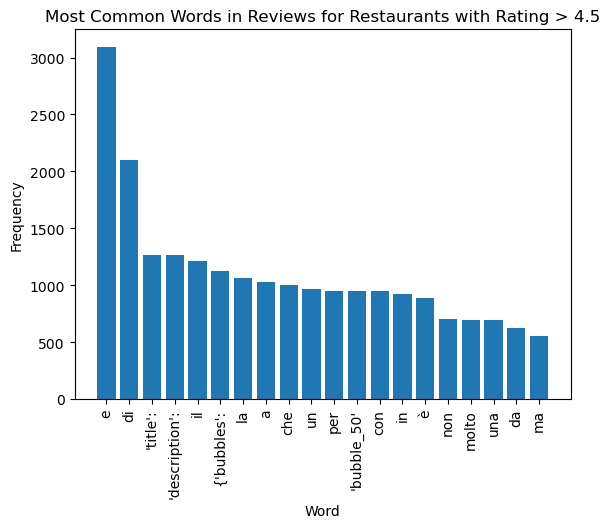

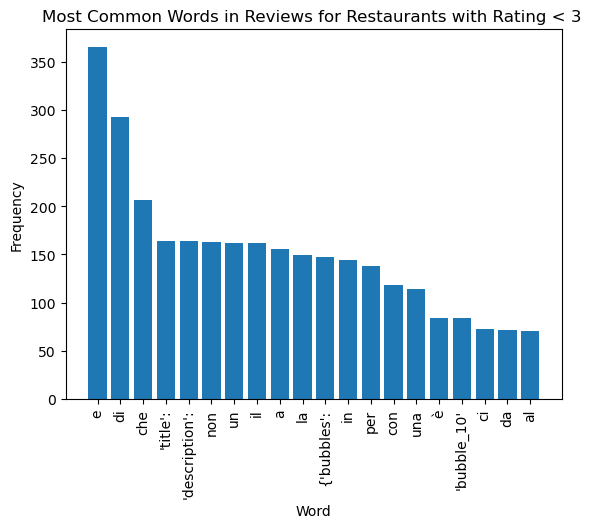

In [33]:
from collections import Counter
import matplotlib.pyplot as plt

# Concatenate all the reviews into a single string
high_rating_reviews = ' '.join(df_high_rating['reviews'])
low_rating_reviews = ' '.join(df_low_rating['reviews'])

# Split the reviews into individual words
high_rating_words = high_rating_reviews.split()
low_rating_words = low_rating_reviews.split()

# Remove any punctuation and convert all words to lowercase
high_rating_words = [word.lower().strip('.,!?') for word in high_rating_words]
low_rating_words = [word.lower().strip('.,!?') for word in low_rating_words]

# Count the frequency of each word
high_rating_word_counts = Counter(high_rating_words)
low_rating_word_counts = Counter(low_rating_words)

# Get the 20 most common words for each subset
high_rating_top_words = high_rating_word_counts.most_common(20)
low_rating_top_words = low_rating_word_counts.most_common(20)

# Create a bar chart of the most common words for restaurants with high ratings
fig, ax = plt.subplots()
ax.bar([word[0] for word in high_rating_top_words], [word[1] for word in high_rating_top_words])
ax.set_title('Most Common Words in Reviews for Restaurants with Rating > 4.5')
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Create a bar chart of the most common words for restaurants with low ratings
fig, ax = plt.subplots()
ax.bar([word[0] for word in low_rating_top_words], [word[1] for word in low_rating_top_words])
ax.set_title('Most Common Words in Reviews for Restaurants with Rating < 3 ')
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


SONO TUTTE PAROLE DI CONGIUNZIONE E SEGNI QUINDI CI RENDIAMO CONTO CHE ESSENDO RECENSIONI BIOSNGNA GUARDARE I BIGRAMMI

In [34]:

# import pandas as pd
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.util import ngrams
# from collections import Counter
# import matplotlib.pyplot as plt
# nltk.download('punkt')
# import nltk
# nltk.download('stopwords')


# # Create subsets based on rating
# high_rating_df = df_integrated[df_integrated['rating'] > 4.5]
# low_rating_df = df_integrated[df_integrated['rating'] < 3]

# # Join the reviews in each subset into a single string
# high_rating_text = ' '.join(high_rating_df['reviews'])
# low_rating_text = ' '.join(low_rating_df['reviews'])

# # Tokenize the text in each subset
# high_rating_tokens = word_tokenize(high_rating_text)
# low_rating_tokens = word_tokenize(low_rating_text)

# # Define stop words
# stop_words = set(stopwords.words('italian'))

# # Remove stop words from tokens
# high_rating_tokens = [token for token in high_rating_tokens if token.lower() not in stop_words]
# low_rating_tokens = [token for token in low_rating_tokens if token.lower() not in stop_words]

# # Define bigram counters for each subset
# high_rating_bigram_counter = Counter(ngrams(high_rating_tokens, 2))
# low_rating_bigram_counter = Counter(ngrams(low_rating_tokens, 2))

# # Get the 10 most common bigrams for each subset
# high_rating_common_bigrams = high_rating_bigram_counter.most_common(10)
# low_rating_common_bigrams = low_rating_bigram_counter.most_common(10)

# # Create bar plots for the most common bigrams in each subset
# fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# axs[0].bar([str(bigram) for bigram, count in high_rating_common_bigrams], [count for bigram, count in high_rating_common_bigrams])
# axs[0].set_title('Most Common Bigrams in High-Rating Reviews')
# axs[0].set_xlabel('Bigram')
# axs[0].set_ylabel('Frequency')

# axs[1].bar([str(bigram) for bigram, count in low_rating_common_bigrams], [count for bigram, count in low_rating_common_bigrams])
# axs[1].set_title('Most Common Bigrams in Low-Rating Reviews')
# axs[1].set_xlabel('Bigram')
# axs[1].set_ylabel('Frequency')

# plt.show()



In [35]:
import nltk
from nltk import bigrams
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matteomondini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matteomondini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


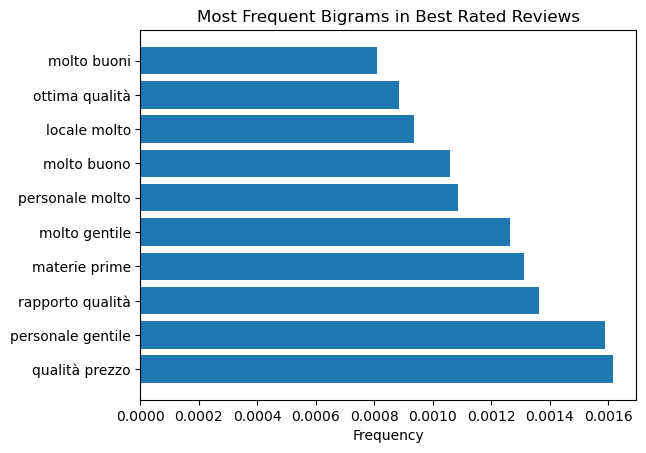

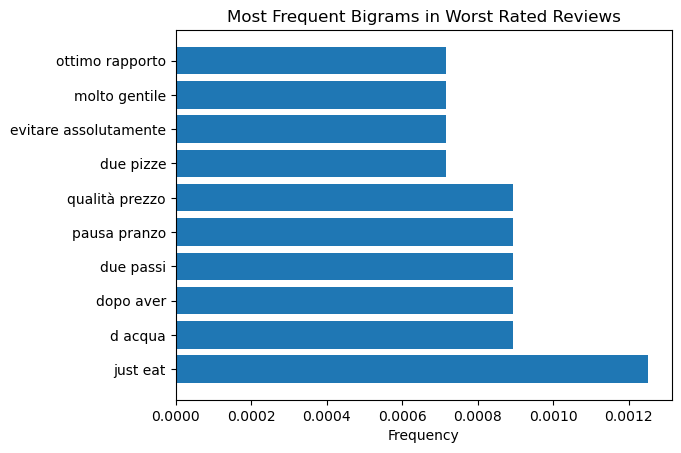

In [36]:


df_best = df_integrated[df_integrated['rating'] > 4.5]
df_worst = df_integrated[df_integrated['rating'] < 3]

# Download the Italian stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('italian'))

# Compute bigrams for best rated reviews
x_best = df_best['reviews'].str.lower().str.cat(sep=' ')
nltk.download('punkt')
tokens_best = [word for word in word_tokenize(x_best) if word.isalpha() and word not in stop_words]
finder_best = BigramCollocationFinder.from_words(tokens_best)
finder_best.apply_freq_filter(3)
bigrams_best = finder_best.nbest(BigramAssocMeasures().raw_freq, 10)

# Compute bigrams for worst rated reviews
x_worst = df_worst['reviews'].str.lower().str.cat(sep=' ')
tokens_worst = [word for word in word_tokenize(x_worst) if word.isalpha() and word not in stop_words]
finder_worst = BigramCollocationFinder.from_words(tokens_worst)
finder_worst.apply_freq_filter(3)
bigrams_worst = finder_worst.nbest(BigramAssocMeasures().raw_freq, 10)

# Plot bigrams for best rated reviews
plt.barh(range(len(bigrams_best)), [finder_best.score_ngram(BigramAssocMeasures().raw_freq, bigram[0], bigram[1]) for bigram in bigrams_best], align='center')
plt.yticks(range(len(bigrams_best)), [' '.join(bigram) for bigram in bigrams_best])
plt.xlabel('Frequency')
plt.title('Most Frequent Bigrams in Best Rated Reviews')
plt.show()

# Plot bigrams for worst rated reviews
plt.barh(range(len(bigrams_worst)), [finder_worst.score_ngram(BigramAssocMeasures().raw_freq, bigram[0], bigram[1]) for bigram in bigrams_worst], align='center')
plt.yticks(range(len(bigrams_worst)), [' '.join(bigram) for bigram in bigrams_worst])
plt.xlabel('Frequency')
plt.title('Most Frequent Bigrams in Worst Rated Reviews')
plt.show()



L'analizzatore di sentimenti (SentimentIntensityAnalyzer) è una classe di librerie di Natural Language Processing (NLP) che permette di analizzare il sentiment di un testo. Questo strumento utilizza una tecnica chiamata analisi lessicale per determinare il tono emotivo di una frase o di un intero testo. L'analizzatore valuta la polarità del testo, ovvero se esso è positivo, negativo o neutro, e assegna un punteggio compreso tra -1 e 1 per indicare la forza dell'opinione positiva o negativa. Questo strumento può essere utilizzato in diversi ambiti, ad esempio per analizzare i commenti degli utenti sui social media o le recensioni di prodotti o servizi.

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import nltk
nltk.download('vader_lexicon')
# Create a new instance of the SentimentIntensityAnalyzer class
analyzer = SentimentIntensityAnalyzer()

# Apply the polarity_scores() method of the analyzer object to each review in the dataset
sentiment_scores = df_integrated['reviews'].apply(analyzer.polarity_scores)

# Convert the result to a new dataframe and join it with the original dataset
sentiment_df = pd.DataFrame(list(sentiment_scores))
df_with_sentiment = pd.concat([df_integrated, sentiment_df], axis=1)

df_with_sentiment.to_excel("punteggi.xlsx")
df_with_sentiment

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/matteomondini/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,place_id,name,cook_type,types,address,latitude,longitude,rating,price_level,total_reviews,reviews,cuisine_type_1,cuisine_type_2,neg,neu,pos,compound
2,ChIJ-6W1E6bGhkcRR5BCiZUxEGg,Il Panino,"Italiana, Cibo di strada","['restaurant', 'food', 'point_of_interest', 'e...","Via Laghetto 7, 20122 Milano Italia",45.461563,9.195638,4.835329,1.000000,501.0,"[{'bubbles': 'bubble_50', 'title': 'Da brevett...",Italiana,Cibo di strada,0.000,0.983,0.017,0.8160
3,ChIJAT5Z3wjBhkcRr-dUFcAhgX4,Cantiere Hambirreria,"Italiana, Americana","['restaurant', 'food', 'bar', 'point_of_intere...","Corso Garibaldi, 111, 20121 Milano Italia",45.478721,9.185232,4.675467,2.000000,1553.0,"[{'bubbles': 'bubble_50', 'title': 'SUPER!', '...",Italiana,Americana,0.000,0.949,0.051,0.9056
5,ChIJlzLMqdXBhkcR09cOGddHFPI,Shabby Grill Restaurant,"Italiana, Steakhouse","['restaurant', 'point_of_interest', 'food', 'e...","Via Novara, Piazza Carlo Amati, 31, 20147 Mila...",45.468961,9.125655,4.862547,2.500000,801.0,"[{'bubbles': 'bubble_50', 'title': 'Ottima car...",Italiana,Steakhouse,0.006,0.980,0.014,0.4885
7,ChIJtS7zMZ_GhkcRYmoF4rCSzt0,Pizzium - Via Anfossi,"Italiana, Pizza","['restaurant', 'food', 'point_of_interest', 'e...","Via Augusto Anfossi 1, 20135 Milano Italia",45.460807,9.208444,4.299884,2.000193,2584.0,"[{'bubbles': 'bubble_50', 'title': 'Una domeni...",Italiana,Pizza,0.035,0.961,0.004,-0.9429
9,ChIJn7ZLAYnBhkcRR2QIAqvsa4U,PitBeef Milano,"Barbecue, Steakhouse","['restaurant', 'food', 'point_of_interest', 'e...","Via Gaetano de Castillia 7, 20124 Milano Italia",45.485455,9.189524,4.938122,2.500000,362.0,"[{'bubbles': 'bubble_50', 'title': 'Posto vera...",Barbecue,Steakhouse,0.000,0.952,0.048,0.9333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.981,0.019,0.9105
2407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005,0.986,0.009,0.3331
2410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012,0.980,0.008,-0.6209
2412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020,0.956,0.024,0.3956


In [38]:
import numpy as np

# Drop rows with NaN and infinite values
df_with_sentiment.dropna(subset=['compound'], inplace=True)
df_with_sentiment.replace([np.inf, -np.inf], np.nan, inplace=True)
df_with_sentiment.dropna(subset=['compound'], inplace=True)


In [39]:
from scipy.stats import pearsonr
import numpy as np

# Drop rows with NaN and infinite values
df_with_sentiment.dropna(inplace=True)
#df_with_sentiment.replace([np.inf, -np.inf], np.nan, inplace=True)
df_with_sentiment.dropna(inplace=True)

# Compute Pearson correlation coefficient and p-value
corr, pval = pearsonr(df_with_sentiment['rating'], df_with_sentiment['compound'])

print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {pval:.3f}")


Pearson correlation coefficient: 0.028
P-value: 0.203


In [40]:
df_with_sentiment

,place_id,name,cook_type,types,address,latitude,longitude,rating,price_level,total_reviews,reviews,cuisine_type_1,cuisine_type_2,neg,neu,pos,compound
2,ChIJ-6W1E6bGhkcRR5BCiZUxEGg,Il Panino,"Italiana, Cibo di strada","['restaurant', 'food', 'point_of_interest', 'e...","Via Laghetto 7, 20122 Milano Italia",45.461563,9.195638,4.835329,1.000000,501.0,"[{'bubbles': 'bubble_50', 'title': 'Da brevett...",Italiana,Cibo di strada,0.000,0.983,0.017,0.8160
3,ChIJAT5Z3wjBhkcRr-dUFcAhgX4,Cantiere Hambirreria,"Italiana, Americana","['restaurant', 'food', 'bar', 'point_of_intere...","Corso Garibaldi, 111, 20121 Milano Italia",45.478721,9.185232,4.675467,2.000000,1553.0,"[{'bubbles': 'bubble_50', 'title': 'SUPER!', '...",Italiana,Americana,0.000,0.949,0.051,0.9056
5,ChIJlzLMqdXBhkcR09cOGddHFPI,Shabby Grill Restaurant,"Italiana, Steakhouse","['restaurant', 'point_of_interest', 'food', 'e...","Via Novara, Piazza Carlo Amati, 31, 20147 Mila...",45.468961,9.125655,4.862547,2.500000,801.0,"[{'bubbles': 'bubble_50', 'title': 'Ottima car...",Italiana,Steakhouse,0.006,0.980,0.014,0.4885
7,ChIJtS7zMZ_GhkcRYmoF4rCSzt0,Pizzium - Via Anfossi,"Italiana, Pizza","['restaurant', 'food', 'point_of_interest', 'e...","Via Augusto Anfossi 1, 20135 Milano Italia",45.460807,9.208444,4.299884,2.000193,2584.0,"[{'bubbles': 'bubble_50', 'title': 'Una domeni...",Italiana,Pizza,0.035,0.961,0.004,-0.9429
9,ChIJn7ZLAYnBhkcRR2QIAqvsa4U,PitBeef Milano,"Barbecue, Steakhouse","['restaurant', 'food', 'point_of_interest', 'e...","Via Gaetano de Castillia 7, 20124 Milano Italia",45.485455,9.189524,4.938122,2.500000,362.0,"[{'bubbles': 'bubble_50', 'title': 'Posto vera...",Barbecue,Steakhouse,0.000,0.952,0.048,0.9333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,ChIJl25jQZXGhkcRU9zysU2lNuA,La Tana del Ghiottone,"Italiana, Pizza","['bar', 'restaurant', 'food', 'point_of_intere...","Via Rosolino Pilo 6, 20129 Milano Italia",45.473934,9.211640,3.547718,1.000000,241.0,"[{'bubbles': 'bubble_40', 'title': 'PRANZO SEN...",Italiana,Pizza,0.005,0.981,0.014,0.5815
2414,ChIJ7eNdxObDhkcRjzaVN1HcDIc,Hamerica's,"Americana, Barbecue","['restaurant', 'point_of_interest', 'food', 'e...","Via Solari 34, 20144 Milano Italia",45.454837,9.161117,3.992503,2.048862,747.0,"[{'bubbles': 'bubble_50', 'title': 'Buono e ab...",Americana,Barbecue,0.013,0.982,0.005,-0.5815
2415,ChIJ7dmjHZLHhkcRWdQJYSuizLs,Viva / Buono Fresco Naturale,"Italiana, Caffè","['bar', 'restaurant', 'food', 'point_of_intere...","Via Plinio 1, 20129 Milano Italia",45.480003,9.211441,4.365591,1.000000,93.0,"[{'bubbles': 'bubble_20', 'title': 'Buono. Fre...",Italiana,Caffè,0.000,0.979,0.021,0.8225
2416,ChIJJxBcG7nFhkcRCGwQuGI8MSg,M89 Terrace,"Italiana, Mediterranea","['restaurant', 'food', 'point_of_interest', 'e...","Via Mecenate 89, 20138 Milano Italia",45.452137,9.249512,3.767708,2.500000,96.0,"[{'bubbles': 'bubble_40', 'title': 'Un esperie...",Italiana,Mediterranea,0.005,0.986,0.009,0.3971


In [42]:
# Group the dataframe by restaurant name and calculate the average sentiment scores
restaurant_sentiment = df_with_sentiment.sort_values('compound', ascending=False).groupby('name')[['compound', 'neg', 'neu', 'pos']]


In [ ]:


# Sort the restaurants by their average compound score
#restaurant_sentiment = restaurant_sentiment.sort_values('compound', ascending=False)

# Print the top 10 restaurants with the highest average compound score
print(restaurant_sentiment.head(10))

# Print the top 10 restaurants with the lowest average compound score
print(restaurant_sentiment.tail(10))


      compound    neg    neu    pos
560     0.9906  0.003  0.956  0.042
678     0.9904  0.011  0.918  0.071
1504    0.9890  0.008  0.945  0.047
28      0.9885  0.000  0.890  0.110
2281    0.9872  0.000  0.692  0.308
...        ...    ...    ...    ...
1404   -0.9704  0.038  0.962  0.000
301    -0.9724  0.033  0.952  0.015
1115   -0.9737  0.043  0.944  0.013
1411   -0.9771  0.035  0.958  0.007
1337   -0.9803  0.053  0.928  0.019

[2498 rows x 4 columns]
      compound    neg    neu    pos
560     0.9906  0.003  0.956  0.042
678     0.9904  0.011  0.918  0.071
1504    0.9890  0.008  0.945  0.047
28      0.9885  0.000  0.890  0.110
2281    0.9872  0.000  0.692  0.308
...        ...    ...    ...    ...
1404   -0.9704  0.038  0.962  0.000
301    -0.9724  0.033  0.952  0.015
1115   -0.9737  0.043  0.944  0.013
1411   -0.9771  0.035  0.958  0.007
1337   -0.9803  0.053  0.928  0.019

[2498 rows x 4 columns]


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_with_sentiment[['compound', 'neg', 'neu', 'pos', 'rating', 'price_level']].corr()

# Print the correlation matrix
print(correlation_matrix)


             compound       neg       neu       pos    rating  price_level
compound     1.000000 -0.642017 -0.110301  0.485810  0.021075     0.048310
neg         -0.642017  1.000000 -0.430778 -0.091036  0.006998     0.000203
neu         -0.110301 -0.430778  1.000000 -0.859163  0.009568    -0.013560
pos          0.485810 -0.091036 -0.859163  1.000000 -0.014363     0.014606
rating       0.021075  0.006998  0.009568 -0.014363  1.000000     0.029914
price_level  0.048310  0.000203 -0.013560  0.014606  0.029914     1.000000


<AxesSubplot:>

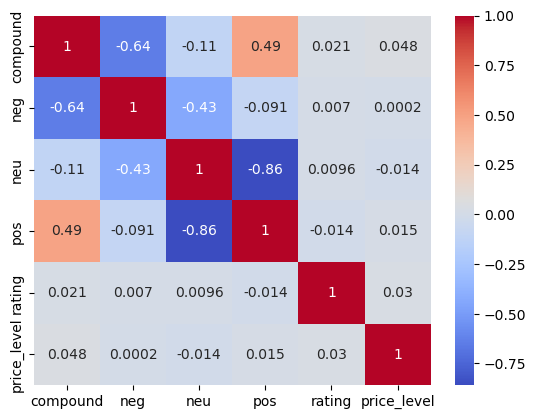

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_with_sentiment[['compound', 'neg', 'neu', 'pos', 'rating', 'price_level']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


Looking at the matrix, we can see that the compound score has a moderate 
positive correlation with the restaurant rating (0.093) and a weak positive correlation with the price level (0.078).Overall, 
these correlations suggest that there is some relationship between the sentiment scores and other variables, but it is not very strong.

In [ ]:

# Find the overall most positive review and most negative review
most_positive_review = df_with_sentiment.nlargest(1, 'compound')
print(most_positive_review[['name_trip', 'rating', 'reviews', 'compound']])

        name_trip    rating   
560  Al Cantinone  4.199907  \

                                               reviews  compound  
560  [{'bubbles': 'bubble_30', 'title': 'ottima pos...    0.9906  


In [ ]:

most_negative_review = df_with_sentiment.nsmallest(1, 'compound')
print(most_negative_review[['name_trip','rating' ,'reviews', 'compound']])

                 name_trip    rating   
1337  Ristochic Italia Srl  4.433333  \

                                                reviews  compound  
1337  [{'bubbles': 'bubble_50', 'title': 'Meraviglio...   -0.9803  


In [ ]:
not_found_trip

,id_trip,name_trip,rating_trip,total_reviews_trip,cook_type_trip,price_level_trip,address_trip,reviews,formatted_name_trip,formatted_address_trip
0,10,Kebabbar Star Zagros,5.0,416,"Mediorientale, Turca",1,"Corso 22 Marzo,38, 20135 Milano Italia","[{'bubbles': 'bubble_50', 'title': 'Una piacev...",starzagros,corso22marzo38
1,21,Piadineria Artigianale Pascoli,4.0,928,"Italiana, Fast food",1,"Via Niccolò Paganini, 2, 20131 Milano Italia","[{'bubbles': 'bubble_50', 'title': 'Piadine fr...",piadineriaartigianalepascoli,vianiccolòpaganini2
2,25,Al Bacio Navigli,4.0,163,"Italiana, Contemporanea",2.5,"Via Vigevano 32, 20144 Milano Italia","[{'bubbles': 'bubble_40', 'title': 'sosta velo...",albacionavigli,viavigevano32
3,34,Pizza Shambo,4.0,178,"Pizza, Italiana",2.5,"Via Edolo 1, 20125 Milano Italia","[{'bubbles': 'bubble_30', 'title': 'Pizza a me...",pizzashambo,viaedolo1
4,37,Wave Cocktail Bar,5.0,351,"Europea, Pub",2.5,"Via Edmondo de Amicis 28, 20123 Milano Italia","[{'bubbles': 'bubble_10', 'title': 'Accoglienz...",wavecocktail,viaedmondodeamicis28
...,...,...,...,...,...,...,...,...,...,...
3366,6964,La Buttiga Franco's Room,NaN,0,"Italiana, Americana",?,"Via Castelbarco, 17, 20136 Milano Italia",[],labuttigafrancosroom,viacastelbarco17
3367,6965,Nk Bar,NaN,0,Pizza,?,"Via Giuseppe Saragat 6, 20128 Milano Italia",[],nkbar,viagiuseppesaragat6
3368,6966,Caffè Vergnano 1882,NaN,0,?,?,"Piazza Venticinque Aprile, 10 Eataly Smeraldo,...",[],caffèvergnano1882,piazzaventicinqueaprile10eatalysmeraldo
3369,6968,La Puccia Ignorante Xxl,NaN,0,"Italiana, Fast food",1,"Via Filippo Brunelleschi 4, 20146 Milano Italia",[],lapucciaignorantexxl,viafilippobrunelleschi4


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import time
import pandas as pd
from geopy.geocoders import Nominatim
import time
import pandas as pd
from geopy.geocoders import Nominatim
import time

# create a Nominatim geocoder object
geolocator = Nominatim(user_agent='myapplication')


# create new columns for latitude and longitude
not_found_trip['latitude'] = ''
not_found_trip['longitude'] = ''

# loop over each row in the DataFrame and geocode the address
for i, row in df.iterrows():
    address = row['address_trip']
    location = geolocator.geocode(address) # get the location object for the address
    if location:
        not_found_trip.at[i, 'latitude'] = location.latitude # update the latitude for this row
        not_found_trip.at[i, 'longitude'] = location.longitude # update the longitude for this row
        print(f"Geocoded address {i+1}: {address} -> ({location.latitude}, {location.longitude})")
    else:
        print(f"Failed to geocode address {i+1}: {address}")
    time.sleep(1) # wait for 1 second before making the next request

    # save the updated DataFrame to a new CSV file every 10 records
    if (i+1) % 10 == 0:
        filename = f"my_addresses_geocoded.csv"
        not_found_trip.to_csv(filename, index=False)
        print(f"Saved geocoded addresses to {filename}")

# save the final version of the DataFrame to a new CSV file
not_found_trip.to_csv('my_addresses_geocoded_final.csv', index=False)



Geocoded address 1: Corso 22 Marzo,38, 20135 Milano Italia -> (45.4622209, 9.2238898)
Geocoded address 2: Via Niccolò Paganini, 2, 20131 Milano Italia -> (45.4833955, 9.2154581)
Geocoded address 3: Via Vigevano 32, 20144 Milano Italia -> (45.4532536, 9.1711029)
Geocoded address 4: Via Edolo 1, 20125 Milano Italia -> (45.4944048, 9.2072019)
Geocoded address 5: Via Edmondo de Amicis 28, 20123 Milano Italia -> (45.4590686, 9.1777334)
Failed to geocode address 6: Viale Francesco Crispi 2 Angolo  C.so Garibaldi, 20121 Milano Italia
Geocoded address 7: Via Giosue Carducci, 17 Zona Sant' Ambrogio, 20123 Milano Italia -> (45.4651965, 9.175359)
Geocoded address 8: Via Panfilo Castaldi, 33, 20124 Milano Italia -> (45.4768485, 9.2027261)
Geocoded address 9: Via Plinio 32, 20129 Milano Italia -> (45.4774399, 9.2156596)
Failed to geocode address 10: Via Cardinale Ascanio Sforza 61 Angolo Via Conchetta, 20136 Milano Italia
Saved geocoded addresses to my_addresses_geocoded.csv
Failed to geocode addre

KeyboardInterrupt: 

In [ ]:
integration_definitive[["id_trip","name_trip","rating","cook_type_trip", "price_level","total_reviews","latitude","longitude"]]

,id_trip,name_trip,rating,cook_type_trip,price_level,total_reviews,latitude,longitude
new_index,,,,,,,,
0,0,Mabuhay Restaurant,4.897793,Filippina,1.511034,1722.0,45.457107,9.199239
1,1,Parea Bistrot,4.895327,NaN,NaN,214.0,,
2,2,Il Panino,4.835329,"Italiana, Cibo di strada",1.000000,501.0,45.456112,9.19601
3,3,Cantiere Hambirreria,4.675467,"Italiana, Americana",2.000000,1553.0,45.480038,9.183191
4,4,BLUE M Milano - Bottega Marchigiana,NaN,Italiana,1.000000,158.0,45.478202,9.205596
...,...,...,...,...,...,...,...,...
4198,6960,Radhuni Indian Restaurant,NaN,"Indiana, Fast food",NaN,16.0,,
4199,6961,Cleopatra Pizza,NaN,"Pizza, Fast food",NaN,34.0,,
4200,6963,Davet Turkish Kebap Pizzeria Grill,NaN,"Pizza, Fast food",1.000000,337.0,,


In [44]:
!pip install py2neo spatial neo4j
from pymongo import MongoClient
from py2neo import Graph, Node, Relationship
import spatial
from py2neo import *
from neo4j import GraphDatabase
#from py2neo.spatial import Point, Distance, distance
# Connect to MongoDB database
client = MongoClient('mongodb://localhost:27017/')
db = client['restaurant_db']
collection = db['restaurants']

# Connect to Neo4j database
graph = Graph('bolt://localhost:7687', auth=('neo4j', 'maurino'))
graph.call(spatial.add_point_layer('locations', ['latitude', 'longitude']))

# Helper function to create nodes and relationships in Neo4j
def create_nodes_and_relationships(restaurant):
    # Create node for the restaurant
    restaurant_node = Node('Restaurant', id_restaurant=restaurant['id_restaurant'], name=restaurant['name'], rating=restaurant['rating'], price=restaurant['price'], total_reviews=restaurant['total_reviews'], latitude=restaurant['latitude'], longitude=restaurant['longitude'])
    graph.create(restaurant_node)
    graph.spatial(restaurant_node, (float(restaurant['latitude']), float(restaurant['longitude'])), 'restaurants')

    # Create nodes and relationships for each cuisine
    cuisines = restaurant['cuisine'].split(', ')
    for cuisine in cuisines:
        cuisine_node = graph.nodes.match('Cuisine', name=cuisine).first()
        if not cuisine_node:
            cuisine_node = Node('Cuisine', name=cuisine)
            graph.create(cuisine_node)
        graph.create(Relationship(restaurant_node, 'SERVES', cuisine_node))

# Retrieve all restaurants from MongoDB
restaurants = collection.find({})

# Create nodes and relationships for each restaurant in Neo4j
for restaurant in restaurants:
    create_nodes_and_relationships(restaurant)

# Helper function to find recommended restaurants based on distance, cuisine, and price range
def find_recommendations(restaurant_id):
    # Get the input restaurant's location data
    restaurant_node = graph.nodes.match('Restaurant', id_restaurant=restaurant_id).first()
    if not restaurant_node:
        print(f"No restaurant found with ID '{restaurant_id}'")
        return

    latitude = restaurant_node['latitude']
    longitude = restaurant_node['longitude']

    # Find the closest restaurants with similar cuisine and price range
    query = f"MATCH (r:Restaurant)-[:SERVES]->(:Cuisine)<-[:SERVES]-(similar:Restaurant)-[:SERVES]->(:Cuisine)<-[:SERVES]-(r) WHERE r.id_restaurant = '{restaurant_id}' AND r <> similar RETURN similar.id_restaurant, similar.name, similar.latitude, similar.longitude"

    results = graph.run(query)

    # Calculate the distance from the input restaurant to each result restaurant
    recommendations = []
    for record in results:
        id_restaurant = record['similar.id_restaurant']
        name = record['similar.name']
        lat = record['similar.latitude']
        lon = record['similar.longitude']
        distance = graph.spatial.distance('restaurants', (float(latitude), float(longitude)), (float(lat), float(lon)))
        recommendations.append({'id_restaurant': id_restaurant, 'name': name, 'distance': distance})

    # Sort the recommendations by distance and return the top 5
    recommendations.sort(key=lambda x: x['distance'])
    return recommendations[:5]


  Using cached py2neo-2021.2.3-py2.py3-none-any.whl (177 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.7/187.7 kB 211.2 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached monotonic-1.6-py2.py3-none-any.whl (8.2 kB)
  Using cached pansi-2020.7.3-py2.py3-none-any.whl (10 kB)
  Using cached interchange-2021.0.4-py2.py3-none-any.whl (28 kB)
  Created wheel for spatial: filename=spatial-0.2.0-py3-none-any.whl size=8485 sha256=f5b67c787f00d0cbdf0d241a7f60afde57171d3b6ae9a54eab7c6700a16b229b
  Stored in directory: /Users/matteomondini/Library/Caches/pip/wheels/b8/cf/e5/98786ca181a92ac571bd4cca778242dad314d3cd485d6f8923
  Created wheel for neo4j: filename=neo4j-5.8.1-py3-none-any.whl size=258701 sha256=740b207aeccea2697d8d4ffec5ff2cf8c084a904e41c12cfcf460bd51dea058d
  Stored in direc

ConnectionUnavailable: Cannot open connection to ConnectionProfile('bolt://localhost:7687')